In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 74.5 MB/s eta 0:00:00


In [ ]:
!pip install patchify

In [ ]:
# Uninstall existing versions of conflicting packages
!pip uninstall -y tensorflow keras tf-keras segmentation-models efficientnet

# Install TensorFlow 2.8.0
!pip install tensorflow==2.8.0

# Install the compatible version of segmentation_models
!pip install segmentation-models==1.0.1  # This version is known to work with TensorFlow 2.x



Found existing installation: tensorflow 2.15.1
Uninstalling tensorflow-2.15.1:
  Successfully uninstalled tensorflow-2.15.1
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from tensorflow.keras.models import Model
import segmentation_models as sm

# Define the custom metric
def jaccard_index(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

# Define the custom loss function
weights = [0.50, 0.50]  # Class weights
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# Define the U-Net model architecture
def multi_unet_model1(n_classes=2, image_height=256, image_width=256, image_channels=3):
    inputs = Input((image_height, image_width, image_channels))

    # Contracting path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    # Define other layers as per your original model

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(p1)
    u6 = concatenate([u6, c1])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c6)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


Segmentation Models: using `keras` framework.


In [ ]:
# Load the model without the optimizer
model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Satellite_Imagery_DLSS/forest_chaco_saved_model1.h5',  # Replace with your actual path
    custom_objects={
        'dice_loss_plus_1focal_loss': total_loss,
        'jaccard_index': jaccard_index
    },
    compile=False  # Load the model without compiling
)

# Now compile the model with a new optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=total_loss,
              metrics=[jaccard_index])

# Verify the model loaded and compiled successfully
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


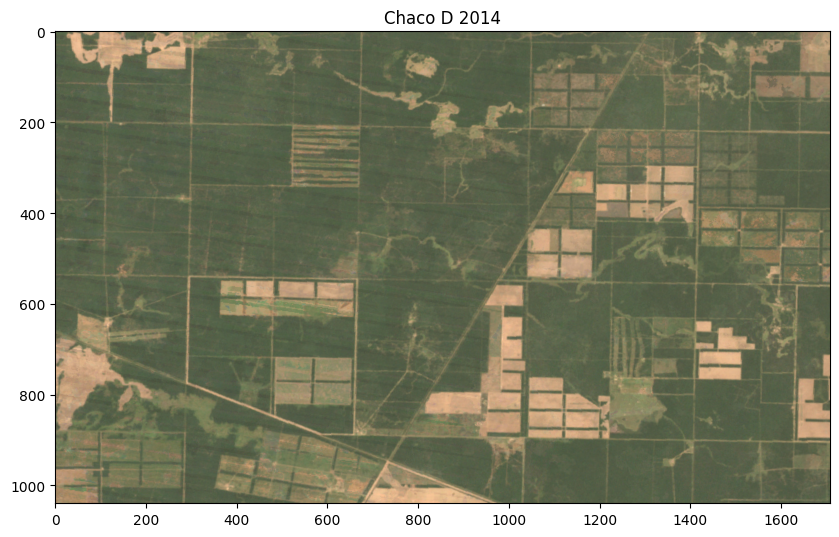

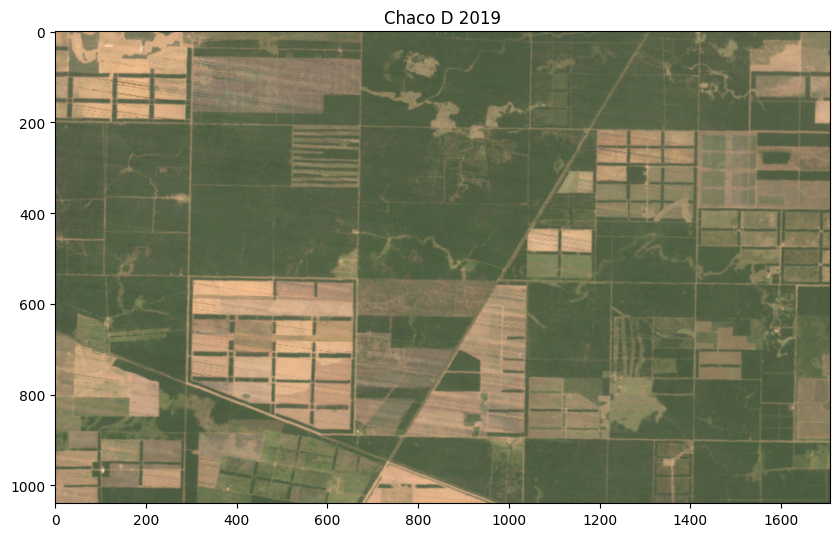

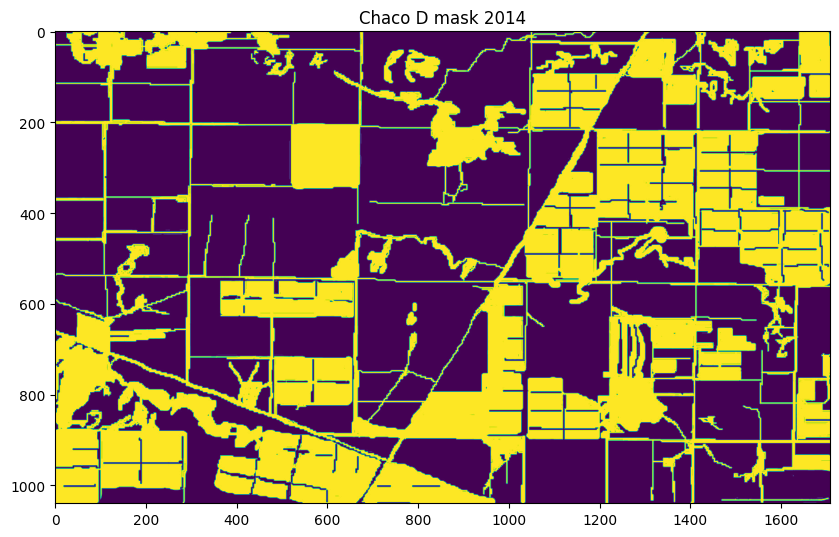

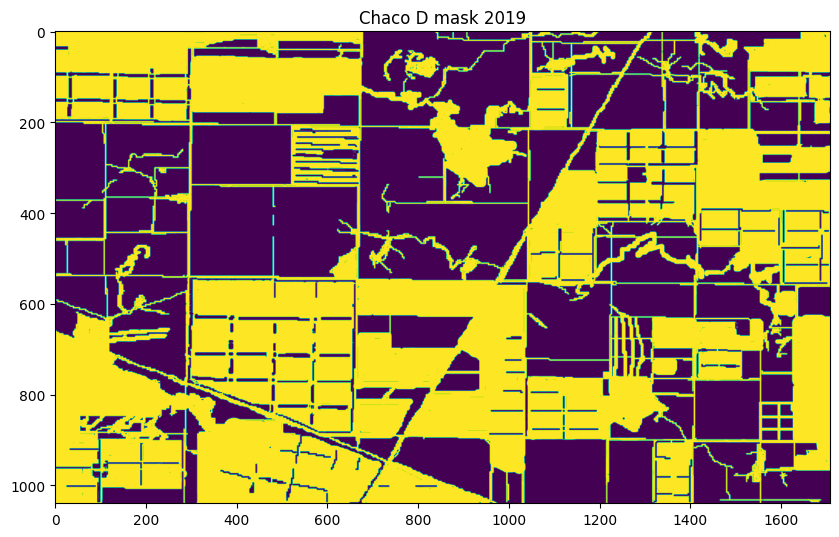

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Define the paths to the .tif files
path_2019 = '/content/drive/MyDrive/Satellite_Imagery_DLSS/jpg/Clipped_Scaled_Composite_2019_4.jpg'
path_2014 = '/content/drive/MyDrive/Satellite_Imagery_DLSS/jpg/Clipped_Scaled_Composite_2014_4.jpg'
mask_2014 = '/content/drive/MyDrive/Satellite_Imagery_DLSS/Masks_for_2014_4.jpg'
mask_2019 = '/content/drive/MyDrive/Satellite_Imagery_DLSS/Masks_for_2019_4.jpg'

# Load the 2019 image
with rasterio.open(path_2019) as dataset_2019:
    chaco_D_2019 = dataset_2019.read()  # Read the image data

# Load the 2014 image
with rasterio.open(path_2014) as dataset_2014:
    chaco_D_2014 = dataset_2014.read()  # Read the image data

# Load the 14 mask
with rasterio.open(mask_2014) as mask_2014:
    chaco_D_mask_2014 = mask_2014.read()

# Load the 19 mask
with rasterio.open(mask_2019) as mask_2019:
    chaco_D_mask_2019 = mask_2019.read()

# Display the 2014 image
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D 2014")
plt.show()

# Display the 2019 image
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_2019.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D 2019")
plt.show()

# Display the 2014 mask
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_mask_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D mask 2014")
plt.show()

# Display the 2019 mask
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_mask_2019.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D mask 2019")
plt.show()

In [ ]:
chaco_D_2014.shape
#chaco_D_2019.shape

(3, 1040, 1708)

In [ ]:
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler

def patching_with_indices(image_2014, image_2019, patch_size=256, minmax_scaler=True):
    def process_image(image):
        # Calculate the closest dimension of the image that is divisible by the patch size.
        size_x = (image.shape[2] // patch_size) * patch_size
        size_y = (image.shape[1] // patch_size) * patch_size

        # Crop the image to the calculated size
        image_cropped = image[:, :size_y, :size_x]

        # Reshape for patchify (input should be HxWxC)
        image_cropped = np.transpose(image_cropped, (1, 2, 0))

        # Create patches
        image_patches = patchify(image_cropped, (patch_size, patch_size, image_cropped.shape[2]), step=patch_size)

        # List to hold patches and their indices
        image_patch_list = []
        indices_list = []

        # Process each patch
        for i in range(image_patches.shape[0]):
            for j in range(image_patches.shape[1]):
                individual_patched_image = image_patches[i, j, 0]

                # Apply MinMax scaling if needed
                if minmax_scaler:
                    scaler = MinMaxScaler()
                    individual_patched_image = scaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)

                image_patch_list.append(individual_patched_image)
                indices_list.append((i, j))  # Store the index of the patch

        return np.array(image_patch_list), indices_list

    # Process both images
    patches_2014, indices_2014 = process_image(image_2014)
    patches_2019, indices_2019 = process_image(image_2019)

    return patches_2014, indices_2014, patches_2019, indices_2019


In [ ]:
# Now you can call the function using your images and masks:
patches_2014, indices_2014, patches_2019, indices_2019 = patching_with_indices(chaco_D_2014, chaco_D_2019, patch_size=256, minmax_scaler=True)

In [ ]:
print(len(patches_2014))
print(len(patches_2019))

24
24


In [ ]:
import matplotlib.pyplot as plt

def visualize_patches(image_patches, mask_patches, num_patches=5):
    plt.figure(figsize=(15, num_patches * 5))

    for i in range(num_patches):
        # Satellite image patch
        plt.subplot(num_patches, 2, 2 * i + 1)
        plt.imshow(image_patches[i])
        plt.title(f"Satellite Image Patch {i+1}")
        plt.axis('off')

        # Corresponding mask patch
        plt.subplot(num_patches, 2, 2 * i + 2)
        plt.imshow(mask_patches[i].squeeze(), cmap='gray')  # Assuming mask is a single-channel image
        plt.title(f"Label Mask Patch {i+1}")
        plt.axis('off')

    plt.show()

# Visualize patches for the 2014 dataset
print("2014 Dataset Patches:")
visualize_patches(patches_2014, mask_patches_2014, num_patches=5)

# Visualize patches for the 2019 dataset
print("2019 Dataset Patches:")
visualize_patches(image_patches_2019, mask_patches_2019, num_patches=5)

2014 Dataset Patches:


NameError: name 'image_patches_2014' is not defined

In [ ]:
# List to store predicted labels
predicted_labels = []

# Predict labels for each patch and store them
for patch_2014, patch_2019 in zip(patches_2014, patches_2019):
    # Ensure the patches have the correct shape for the model
    patch_2014_for_prediction = np.expand_dims(patch_2014, axis=0)
    patch_2019_for_prediction = np.expand_dims(patch_2019, axis=0)

    # Predict using the model
    prediction_2014 = model.predict(patch_2014_for_prediction)
    prediction_2019 = model.predict(patch_2019_for_prediction)

    # Convert predictions to class labels (argmax)
    predicted_label_2014 = np.argmax(prediction_2014, axis=-1)
    predicted_label_2019 = np.argmax(prediction_2019, axis=-1)

    # Store predicted labels
    predicted_labels.append(predicted_label_2014)
    predicted_labels.append(predicted_label_2019)

In [ ]:
#for i, predicted_label in enumerate(predicted_labels):
#    plt.figure(figsize=(6, 6))
#    plt.imshow(np.squeeze(predicted_label), cmap='gray')  # Squeeze to remove the extra dimension
#    plt.title(f'Predicted Label for Patch {i+1}')
#    plt.axis('off')
#    plt.show()

In [ ]:
def reconstruct_images_from_predicted_labels(predicted_labels, indices_2014, indices_2019, patch_size=256):
    # Determine the number of patches along the height and width based on indices
    max_y_index_2014 = max([i for i, _ in indices_2014]) + 1
    max_x_index_2014 = max([j for _, j in indices_2014]) + 1

    max_y_index_2019 = max([i for i, _ in indices_2019]) + 1
    max_x_index_2019 = max([j for _, j in indices_2019]) + 1

    # Create empty arrays to hold the reconstructed images
    reconstructed_image_2014 = np.zeros((max_y_index_2014 * patch_size, max_x_index_2014 * patch_size))
    reconstructed_image_2019 = np.zeros((max_y_index_2019 * patch_size, max_x_index_2019 * patch_size))

    # Separate predicted labels into two lists for 2014 and 2019 images
    predicted_labels_2014 = predicted_labels[::2]  # Taking every other label starting from the first
    predicted_labels_2019 = predicted_labels[1::2]  # Taking every other label starting from the second

    # Place each patch back in its original position for 2014 image
    for patch, (i, j) in zip(predicted_labels_2014, indices_2014):
        y_start = i * patch_size
        x_start = j * patch_size

        # Place the patch back into the reconstructed image
        reconstructed_image_2014[y_start:y_start + patch_size, x_start:x_start + patch_size] = patch

    # Place each patch back in its original position for 2019 image
    for patch, (i, j) in zip(predicted_labels_2019, indices_2019):
        y_start = i * patch_size
        x_start = j * patch_size

        # Place the patch back into the reconstructed image
        reconstructed_image_2019[y_start:y_start + patch_size, x_start:x_start + patch_size] = patch

    return reconstructed_image_2014, reconstructed_image_2019

In [ ]:
# Assuming original_shape is the shape of the original images (C, H, W)
original_shape = chaco_D_2014.shape

# Reconstruct the images from predicted labels
reconstructed_image_2014, reconstructed_image_2019 = reconstruct_images_from_predicted_labels(
    predicted_labels, indices_2014, indices_2019, patch_size=256
)

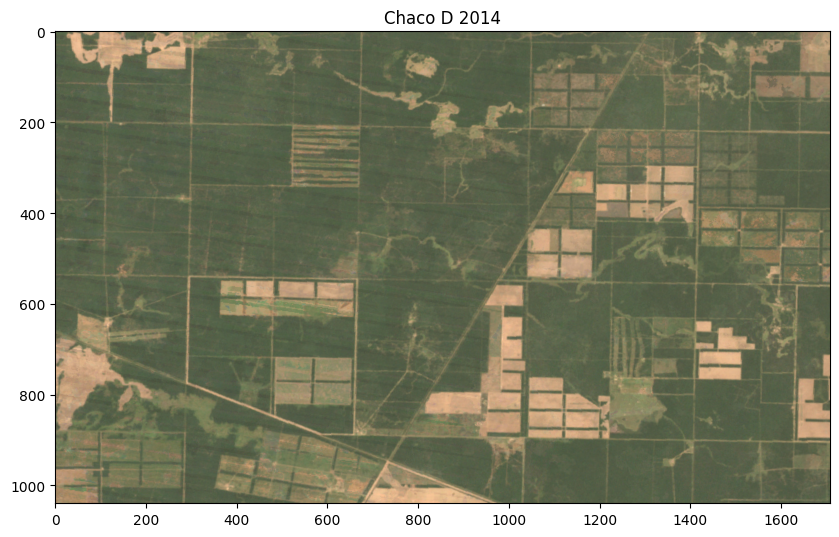

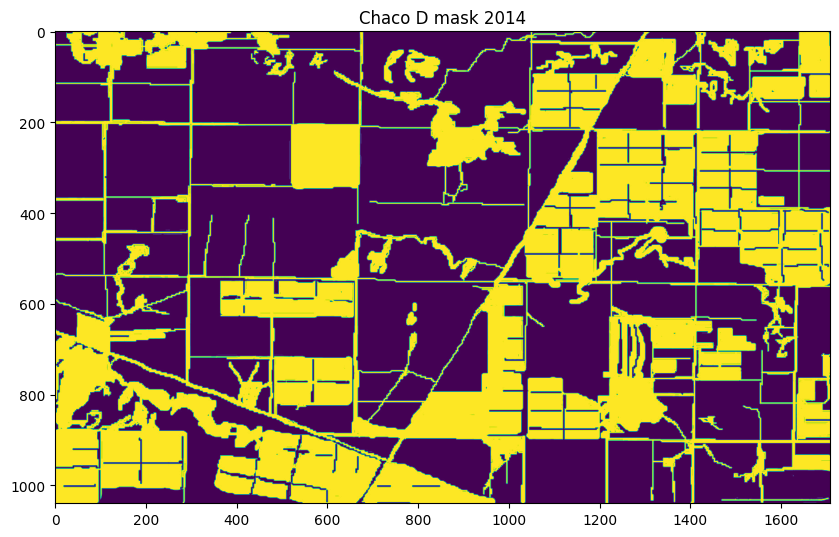

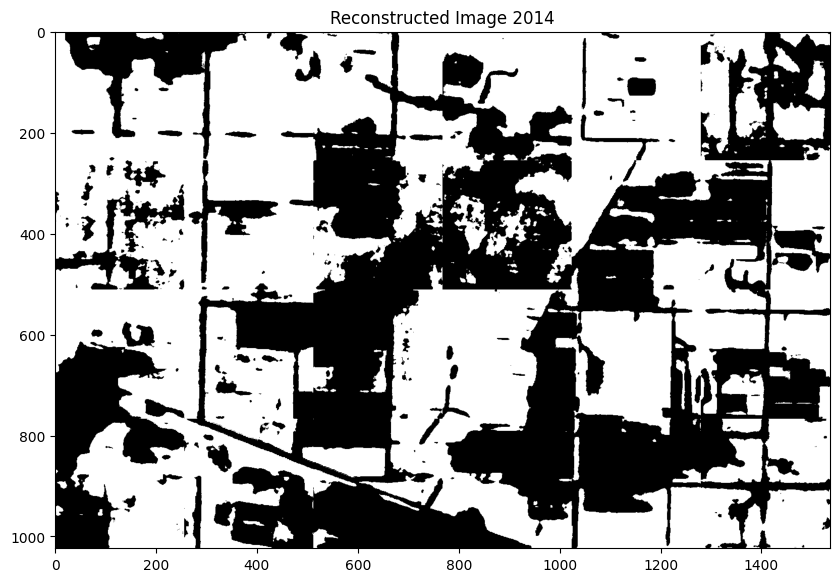

In [ ]:
# Assuming reconstructed_image_2014 is already defined

# Display the 2014 image
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D 2014")
plt.show()

# Display the 2014 mask
plt.figure(figsize=(10, 10))
plt.imshow(chaco_D_mask_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
plt.title("Chaco D mask 2014")
plt.show()

# Visualize the reconstructed image for 2014
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(reconstructed_image_2014, cmap='gray')  # Display the image in grayscale
plt.title('Reconstructed Image 2014')  # Set the title of the plot
plt.show()  # Render the plot



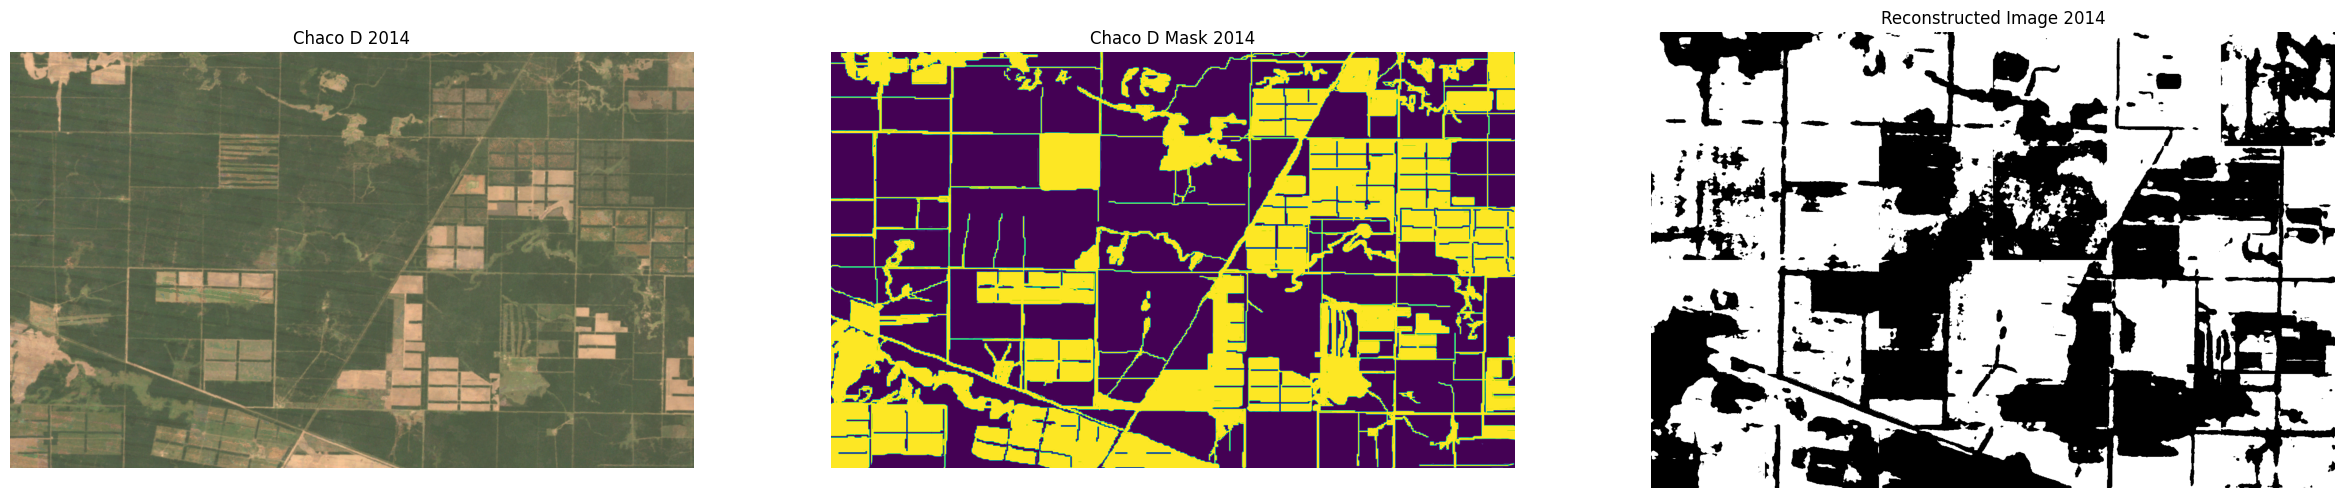

In [ ]:
# Create a figure with 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Adjust the figsize as needed

# Display the 2014 image
axes[0].imshow(chaco_D_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
axes[0].set_title("Chaco D 2014")

# Display the 2014 mask
axes[1].imshow(chaco_D_mask_2014.transpose(1, 2, 0))  # Adjust dimensions for plotting
axes[1].set_title("Chaco D Mask 2014")

# Visualize the reconstructed image for 2014
axes[2].imshow(reconstructed_image_2014, cmap='gray')  # Display the image in grayscale
axes[2].set_title("Reconstructed Image 2014")

# Hide axes ticks for a cleaner look
for ax in axes:
    ax.axis('off')

plt.show()  # Render the plots

In [ ]:
# Create a figure with 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Adjust the figsize as needed

# Display the 2014 image
axes[0].imshow(chaco_D_2019.transpose(1, 2, 0))  # Adjust dimensions for plotting
axes[0].set_title("Chaco D 2014")

# Display the 2014 mask
axes[1].imshow(chaco_D_mask_2019.transpose(1, 2, 0))  # Adjust dimensions for plotting
axes[1].set_title("Chaco D Mask 2014")

# Visualize the reconstructed image for 2014
axes[2].imshow(reconstructed_image_2019, cmap='gray')  # Display the image in grayscale
axes[2].set_title("Reconstructed Image 2014")

# Hide axes ticks for a cleaner look
for ax in axes:
    ax.axis('off')

plt.show()  # Render the plots

In [ ]:
image_array = np.array(reconstructed_image_2014)

print(image_array)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
def calculate_pixel_percentages(image):
    """
    Calculate the percentage of white and black pixels in a binary image.

    image: numpy array, the binary image data (0 for black, 1 for white).
    return: tuple, (percentage of white pixels, percentage of black pixels).
    """
    # turning image into array
    image_array = np.array(image)
    # Count total pixels
    total_pixels = image_array.size

    # Count white pixels (where pixel value is 1)
    white_pixels = np.sum(image_array)

    # Count black pixels (total pixels minus white pixels)
    black_pixels = total_pixels - white_pixels

    # Calculate percentages
    white_pixel_percentage = (white_pixels / total_pixels) * 100
    black_pixel_percentage = (black_pixels / total_pixels) * 100

    return white_pixel_percentage, black_pixel_percentage

In [ ]:
white_percentage_2, black_percentage_2 = calculate_pixel_percentages(reconstructed_image_2019)

print(f"Percentage of white pixels: {white_percentage_2:.2f}%")
print(f"Percentage of black pixels: {black_percentage_2:.2f}%")

Percentage of white pixels: 50.68%
Percentage of black pixels: 49.32%


In [ ]:
white_percentage_1, black_percentage_1 = calculate_pixel_percentages(reconstructed_image_2014)

print(f"Percentage of white pixels: {white_percentage_1:.2f}%")
print(f"Percentage of black pixels: {black_percentage_1:.2f}%")

Percentage of white pixels: 58.70%
Percentage of black pixels: 41.30%


So As white pixels mean forest and black pixel mean no forest: Change will be defined as Picture_1_white_pixels - Picture_2_white_pixels = deforestation:


In [ ]:
change = white_percentage_1 - white_percentage_2

print(f"In the area of interst {change} % of forest that in the first satellite image was detected was deforested in the second image")

In the area of interst 8.025932312011719 % of forest that in the first satellite image was detected was deforested in the second image
